<a href="https://colab.research.google.com/github/reemap22/A-B--Testing-Experimental-Design/blob/main/project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#Eniac's Case
The Marketing Team Lead is convinced that offering discounts is beneficial in the long run. She believes discounts improve customer acquisition, satisfaction and retention, and allow the company to grow.

The main investors in the Board are worried about offering aggressive discounts. They have pointed out how the company’s recent quarterly results showed an increase in orders placed, but a decrease in the total revenue. They prefer that the company positions itself in the quality segment, rather than competing to offer the lowest prices in the market.



In [ ]:
# import libraries
#import pandas as pd

# load data
# This code is made to load our data stored on Google Drive
#def gd_path(file_id):
#   """Generate a shareable link from Google Drive file id."""
 #   return f"https://drive.google.com/uc?export=download&id={file_id}"
# Google Drive file ids
#files_id = {
 #   "brands": "1AHtE3qOb2Nubb-fLYeQJboB-D2Vei0zk",
 #   "orderlines": "1qufluxQRg542jbZwagauE_CoSuU0-hj3",
  #  "orders": "1D4fEvw2btogR1A0LJhD9fbKz3bguuawr",
 #   "products": "1Wo-YHFbe7e2TGTQlXMzQja1phz2HSSmg",
#}

# Read data from Google Drive
#brands = pd.read_csv(gd_path(files_id["brands"]), sep=",")
#orderlines = pd.read_csv(gd_path(files_id["orderlines"]), sep=",")
#orders = pd.read_csv(gd_path(files_id["orders"]), sep=",")
#products = pd.read_csv(gd_path(files_id["products"]), sep=",")


In [ ]:
import pandas as pd

In [ ]:
url = "https://drive.google.com/file/d/1tsCP3YUGmxp3i0I5lRs7_8XDMYWTd4HJ/view?usp=drive_link"
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
products = pd.read_csv(path)

url = "https://drive.google.com/file/d/1PtPPww7U-gxm_JolJsU23Z9WBa_oBvaZ/view?usp=drive_link"
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
orders = pd.read_csv(path)

url = "https://drive.google.com/file/d/1HJaRmWsQL4aeU6umdedPpUj__mWV_5kQ/view?usp=drive_link"
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
orderlines = pd.read_csv(path)

url = "https://drive.google.com/file/d/1228LW6cfSlNFVTlLqH4CzO71dJKi8iqu/view?usp=drive_link"
path = "https://drive.google.com/uc?export=download&id=" + url.split("/")[-2]
brands = pd.read_csv(path)

##brands

In [ ]:
brands

,short,long
0,8MO,8Mobility
1,ACM,Acme
2,ADN,Adonit
3,AII,Aiino
4,AKI,Akitio
...,...,...
182,XOO,Xoopar
183,XRI,X-Rite
184,XTO,Xtorm
185,ZAG,ZaggKeys


##orders

In [ ]:
orders

,order_id,created_date,total_paid,state
0,241319,2017-01-02 13:35:40,44.99,Cancelled
1,241423,2017-11-06 13:10:02,136.15,Completed
2,242832,2017-12-31 17:40:03,15.76,Completed
3,243330,2017-02-16 10:59:38,84.98,Completed
4,243784,2017-11-24 13:35:19,157.86,Cancelled
...,...,...,...,...
226904,527397,2018-03-14 13:56:38,42.99,Place Order
226905,527398,2018-03-14 13:57:25,42.99,Shopping Basket
226906,527399,2018-03-14 13:57:34,141.58,Shopping Basket
226907,527400,2018-03-14 13:57:41,19.98,Shopping Basket


###Checking for duplicated values

In [ ]:
# orders
orders.duplicated().sum()

0

###Checking for missing values





In [ ]:
orders.isnull().sum() # To find the total amount of missing values on products.


order_id        0
created_date    0
total_paid      5
state           0
dtype: int64

In [ ]:
orders.isnull().sum() / len(orders) * 100 # To show the percentage rrepresented by this missing values


order_id        0.000000
created_date    0.000000
total_paid      0.002204
state           0.000000
dtype: float64

As there is such a tiny amount of missing values, we will simply delete these rows, as we have enough data without them.

In [ ]:
orders = orders.loc[~orders.total_paid.isna(), :]

###Changing Data Types

##orderlines

In [ ]:
orderlines

,id,id_order,product_id,product_quantity,sku,unit_price,date
0,1119109,299539,0,1,OTT0133,18.99,2017-01-01 00:07:19
1,1119110,299540,0,1,LGE0043,399.00,2017-01-01 00:19:45
2,1119111,299541,0,1,PAR0071,474.05,2017-01-01 00:20:57
3,1119112,299542,0,1,WDT0315,68.39,2017-01-01 00:51:40
4,1119113,299543,0,1,JBL0104,23.74,2017-01-01 01:06:38
...,...,...,...,...,...,...,...
293978,1650199,527398,0,1,JBL0122,42.99,2018-03-14 13:57:25
293979,1650200,527399,0,1,PAC0653,141.58,2018-03-14 13:57:34
293980,1650201,527400,0,2,APP0698,9.99,2018-03-14 13:57:41
293981,1650202,527388,0,1,BEZ0204,19.99,2018-03-14 13:58:01


### Duplicated Values

In [ ]:
orderlines.duplicated().sum()

0

### Checking for missing values

In [ ]:
orderlines.isnull().sum() # To find the total amount of missing values on products.

id                  0
id_order            0
product_id          0
product_quantity    0
sku                 0
unit_price          0
date                0
dtype: int64

In [ ]:
orderlines.isnull().sum() / len(orderlines) * 100 # To show the percentage rrepresented by this missing values

id                  0.0
id_order            0.0
product_id          0.0
product_quantity    0.0
sku                 0.0
unit_price          0.0
date                0.0
dtype: float64

###Changing Data Types

 date into dateType

In [ ]:
orderlines.unit_price.str.contains("\d+\.\d+\.\d+").value_counts()

False    257814
True      36169
Name: unit_price, dtype: int64

In [ ]:
orderlines["date"] = pd.to_datetime(orderlines["date"])

unit_price to numeric

In [ ]:
orderlines["unit_price"] = pd.to_numeric(orderlines["unit_price"])
# ValueError: Unable to parse string "1.137.99" at position 6

ValueError: ignored

##products

## **In this table we Changed the data type of price and promo_price and romove corrupted information**

In [ ]:
products

,sku,name,desc,price,promo_price,in_stock,type
0,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,499.899,1,8696
1,APP0023,Apple Mac Keyboard Keypad Spanish,USB ultrathin keyboard Apple Mac Spanish.,59,589.996,0,13855401
2,APP0025,Mighty Mouse Apple Mouse for Mac,mouse Apple USB cable.,59,569.898,0,1387
3,APP0072,Apple Dock to USB Cable iPhone and iPod white,IPhone dock and USB Cable Apple iPod.,25,229.997,0,1230
4,KIN0007,Mac Memory Kingston 2GB 667MHz DDR2 SO-DIMM,2GB RAM Mac mini and iMac (2006/07) MacBook Pr...,34.99,31.99,1,1364
...,...,...,...,...,...,...,...
19321,BEL0376,Belkin Travel Support Apple Watch Black,compact and portable stand vertically or horiz...,29.99,269.903,1,12282
19322,THU0060,"Enroute Thule 14L Backpack MacBook 13 ""Black",Backpack with capacity of 14 liter compartment...,69.95,649.903,1,1392
19323,THU0061,"Enroute Thule 14L Backpack MacBook 13 ""Blue",Backpack with capacity of 14 liter compartment...,69.95,649.903,1,1392
19324,THU0062,"Enroute Thule 14L Backpack MacBook 13 ""Red",Backpack with capacity of 14 liter compartment...,69.95,649.903,0,1392


####products/price

###Look for Duplicates

In [ ]:
# Finding the duplicates values in the products DataFrame with the `.duplicated´ method
products.duplicated().sum()

8746

In [ ]:
products.drop_duplicates(inplace=True)

In [ ]:
products.duplicated().sum()

0

###Looking for missing values

In [ ]:
products.isnull().sum() # To find the total amount of missing values on products.

sku             0
name            0
desc            7
price          46
promo_price     0
in_stock        0
type           50
dtype: int64

In [ ]:
products.isnull().sum() / len(products) * 100 # To show the percentage rrepresented by this missing values

sku            0.000000
name           0.000000
desc           0.066163
price          0.434783
promo_price    0.000000
in_stock       0.000000
type           0.472590
dtype: float64

###Checking & Changing Data Types

price

In [ ]:
products["price"] = pd.to_numeric(products["price"])

As we tried to change the datatype of prices we identified many numers with two decimal spaces.

In [ ]:
products['price'].astype(str).str.contains(r"\d+\.\d+\.\d+").value_counts()

False    10580
Name: price, dtype: int64

In [ ]:
products['price'].astype(str).str.contains(r"\d+\.\d+\.\d+").value_counts(normalize=True) * 100

False    96.436673
True      3.563327
Name: price, dtype: float64

In [ ]:
#Here we decided to coerce the errors given on the convertion of prices into NaN values for the sake of the project
products['price'] = pd.to_numeric (products['price'], errors='coerce')

promo_price

In [ ]:
#Here we change promo_prices into "Float" Datatype
#products["promo_price"] = products["promo_price"].astype(float)
products["promo_price"] = products["promo_price"].astype(float)


ValueError: ignored

In [ ]:
products['promo_price'].astype(str).str.contains(r"\d+\.\d+\.\d+").value_counts(normalize=True) * 100

False    56.550095
True     43.449905
Name: promo_price, dtype: float64

Here we asume there is corrupted data in promo_prices so we star looking for values afected by the decimal problem

In [ ]:
promo_problems_number = products.loc[(products.promo_price.astype(str).str.contains("\d+\.\d+\.\d+"))|(products.promo_price.astype(str).str.contains("\d+\.\d{3,}")), :].shape[0]
print(f"The column promo_price has in total {promo_problems_number} wrong values. This is {round(((promo_problems_number / products.shape[0]) * 100), 2)}% of the rows of the DataFrame")

The column promo_price has in total 9734 wrong values. This is 92.0% of the rows of the DataFrame


In [ ]:
# Here we open the table under the condition of the error to reassure the last output is accurate
promo_price = products.loc[(products.promo_price.astype(str).str.contains("\d+\.\d+\.\d+"))|(products.promo_price.astype(str).str.contains("\d+\.\d{3,}")), :]
promo_price.sample(50)

,sku,name,desc,price,promo_price,in_stock,type
16597,APP2344,"Apple MacBook Pro 15 ""Core i7 Touch Bar 28GHz ...",New MacBook Pro 15-inch Touch Bar to 28GHz Cor...,3519.000,3.273.004,0,"1,02E+12"
17600,MOS0230,Moshi Vesta X iPhone Case Gray Twill,retro sophistication to your iPhone with raise...,40.000,339.901,1,11865403
17032,OWC0231,OWC USB Dock-C 10-port power 80W Rose Gold,Aluminum Hub with 10 different ports include 2...,217.990,1.799.899,0,12995397
13422,APP1776,Smart Battery Apple Battery Case iPhone 6s Cha...,Battery Case for iPhone 6s and 6,119.000,1.099.902,0,"5,49E+11"
12063,TPL0008,TP-Link Wireless USB Adapter T4U Archer Mac Wi...,Pen Drive Adapter USB 3.0 WiFi AC1200 double b...,42.230,319.997,0,1334
17987,APP1673-A,Open - Apple iPhone Silicone Case Cover Red 8/7,Ultrathin silicone case and microfiber premium...,39.000,330.003,0,11865403
775,MAK0022,Maclocks BrandMe Customizable iPad Stand Exclu...,IPad support for customizable floor with your ...,489.990,4.899.895,0,1216
1796,BEZ0180,Be.ez LArobe MacBook Pro Retina sleeve ONE 13 ...,Neoprene Sleeve for MacBook Pro Retina 13 inches.,29.950,199.892,0,13835403
10870,APP1209,"Apple iPad Pro 12.9 ""Wi-Fi + Cellular 128GB Gold",Pro 12.9-inch new iPad Wi-Fi + Cellular 128GB.,1159.000,1.116.801,0,1714
3132,LEX0023,Lexar Professional SDHC SD 64GB Class 10 633x ...,Speed ​​SDHC Memory Card 95MB / 45MB to 64GB.,35.990,279.873,0,57445397


In [ ]:
# As 93% of the data seems untrustworthy, and deleting so many rows will leave us without products, we delete this column.
products_cl = products.drop(columns=["promo_price"])

In [ ]:
products_cl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10580 entries, 0 to 19325
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sku       10580 non-null  object 
 1   name      10580 non-null  object 
 2   desc      10573 non-null  object 
 3   price     10157 non-null  float64
 4   in_stock  10580 non-null  int64  
 5   type      10530 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 578.6+ KB


# Data quality work




In [ ]:

orders.to_csv("orders_cl.csv", index=False)
files.download("orders_cl.csv")

orderlines.to_csv("orderlines_cl.csv", index=False)
files.download("orderlines_cl.csv")

products_cl.to_csv("products_cl.csv", index=False)
files.download("products_cl.csv")


clean datasets

In [ ]:
import pandas as pd

def gd_path(file_id):
    """Generate a shareable link from Google Drive file id."""
    return f"={file_id}"

# Google Drive file ids
file_ids = {
    "brands": "14_RkEUuhf9-otJqbVITDTvus45zR8LJp",
    "orderlines": "18Tzi4SxwYsijRdhvUQUGSdi0A2WzlzA9",
    "orders": "14HwyeNbaWy8IZ9BkwbDSxfDURHUtJzJ7",
    "products": "1fQVI9IhFcDFMCEl5AQzJNKcEFMnYyLuA",
}

# Read data from Google Drive
brands_cl = pd.read_csv(gd_path(file_ids["brands"]), sep=",")
orderlines_cl = pd.read_csv(gd_path(file_ids["orderlines"]), sep=",", parse_dates=["date"])
orders_cl = pd.read_csv(gd_path(file_ids["orders"]), sep=",", parse_dates=["created_date"])
products_cl = pd.read_csv(gd_path(file_ids["products"]), sep=",")

#  <u>Analizing Discounts</u>

##Does revenue grows when discounts increases?

* *The Marketing Team Lead is convinced that offering discounts is beneficial in the long run. She believes discounts improve customer acquisition, satisfaction and retention, and allow the company to grow.*
* *The main investors in the Board are worried about offering aggressive discounts. They have pointed out how the company’s recent quarterly results showed an increase in orders placed, but a decrease in the total revenue. They prefer that the company positions itself in the quality segment, rather than competing to offer the lowest prices in the market.*

In [ ]:
ol = orderlines_df
p = products_df
p_ol = ol.merge(
    p,
    how="left",
    left_on="sku",
    right_on="sku"
)

o = orders_df
p_ol_o = p_ol.merge(
    o,
    how="left",
    left_on="id_order",
    right_on="order_id"
)

`p_ol_o` is the merger of the datasets `products_df`, `orderlines_df` and `orders_df`.

Just an overview of the discounts:

In [ ]:
p_ol_o["discount"] = p_ol_o["price"] - p_ol_o["unit_price"]
p_ol_o[["sku", "name", "unit_price", "price", "discount", "date"]]

,sku,name,unit_price,price,discount,date
0,OTT0133,Otterbox iPhone Case Symmetry 2.0 SE / 5s / 5 ...,18.99,34.99,16.00,2017-01-01 00:07:19
1,LGE0043,"27UD58-B LG Monitor 27 ""4K UHD DisplayPort",399.00,429.00,30.00,2017-01-01 00:19:45
2,PAR0071,Parrot Bebop 2 White + Command FLYPAD and FPV ...,474.05,699.00,224.95,2017-01-01 00:20:57
3,WDT0315,"Blue WD 2TB Hard Drive 35 ""Mac and PC",68.39,79.00,10.61,2017-01-01 00:51:40
4,JBL0104,Gray Bluetooth Speaker JBL GO,23.74,29.90,6.16,2017-01-01 01:06:38
...,...,...,...,...,...,...
216245,JBL0122,JBL T450 BT Bluetooth Headset Black,42.99,49.95,6.96,2018-03-14 13:57:25
216246,PAC0653,Samsung SSD 850 expansion kit EVO 250GB + Data...,141.58,215.98,74.40,2018-03-14 13:57:34
216247,APP0698,Apple Lightning Cable Connector to USB 1m Whit...,9.99,25.00,15.01,2018-03-14 13:57:41
216248,BEZ0204,"Be.ez LArobe Case Mix Macbook 12 ""Green",19.99,29.99,10.00,2018-03-14 13:58:01


Discount and time dimension:

In [ ]:
sorted_discounts = p_ol_o.sort_values(by='discount', ascending=False)
sorted_discounts[["sku", "name", "unit_price", "price", "discount", "date"]]

line chart with two lines (one the sales, and the other one the sum / count of discounts)

In [ ]:
daily_sales = p_ol_o.groupby(p_ol_o['date'].dt.date)['price'].sum()
daily_discounts = p_ol_o.groupby(p_ol_o['date'].dt.date)['discount'].count()

In [ ]:
daily_data = pd.concat([daily_sales, daily_discounts], axis=1).reset_index()
daily_data.columns = ['date', 'sales', 'discount_count']

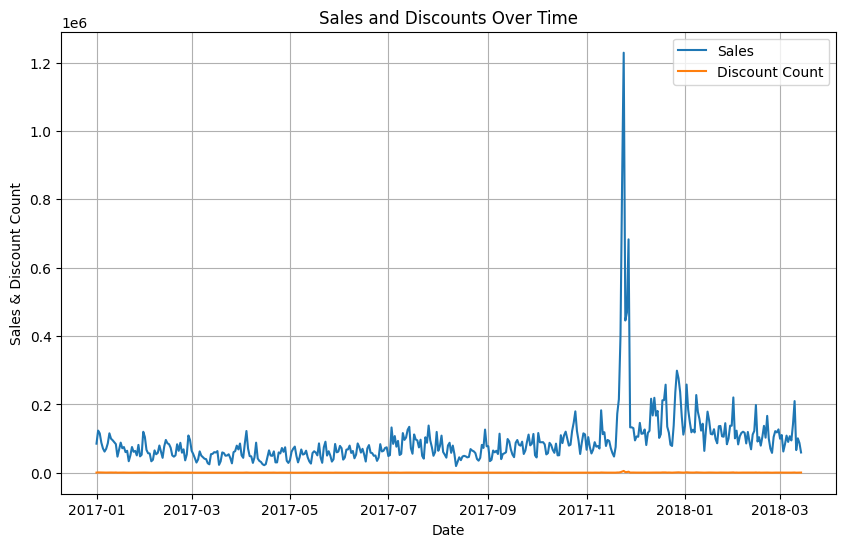

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(daily_data['date'], daily_data['sales'], label='Sales')
plt.plot(daily_data['date'], daily_data['discount_count'], label='Discount Count')

plt.xlabel('Date')
plt.ylabel('Sales & Discount Count')
plt.title('Sales and Discounts Over Time')
plt.legend()
plt.grid(True)
plt.show()